## Import libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from feature_engine.creation import CyclicalFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

## Prepare the dataset

In [2]:
url = 'https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv'
# work with only 2020 and earlier data as the challenge rules suggest
df = pd.read_csv(url)
df = df[df.JAHR<2022].fillna(method="ffill",axis='columns')
df = df[df.MONAT!='Summe'].reset_index()
df['MONAT_INT'] = df['MONAT'].astype(int)

In [3]:
train_df = df[df.JAHR<2021][df.MONATSZAHL=='Alkoholunfälle'][df.AUSPRAEGUNG=='insgesamt'][df.MONAT!='Summe']
test_df = df[df.JAHR==2021][df.MONATSZAHL=='Alkoholunfälle'][df.AUSPRAEGUNG=='insgesamt'][df.MONAT!='Summe']

features_list = ['JAHR','MONAT_INT','VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']
X_train, X_val, y_train, y_val = train_test_split(train_df[features_list].values, train_df['WERT'].to_list(), test_size=0.2, random_state=42, shuffle=True)
X_test, y_test = test_df[features_list].values, test_df['WERT'].to_list()

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(201, 6)
(51, 6)
(12, 6)


/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## Build a Random Forest model

In [4]:
rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [5]:
pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)
pred_test = rf.predict(X_test)

In [6]:
print(mse(y_train, pred_train, squared=False))
print(mse(y_val, pred_val, squared=False))
print(mse(y_test, pred_test, squared=False))

1.8159226647569844
3.310562715037441
4.359775414705059


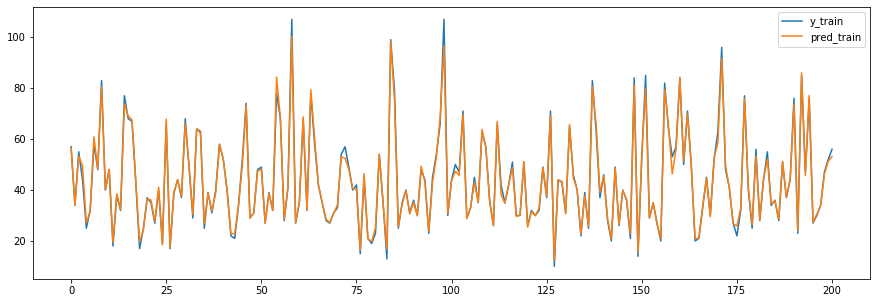

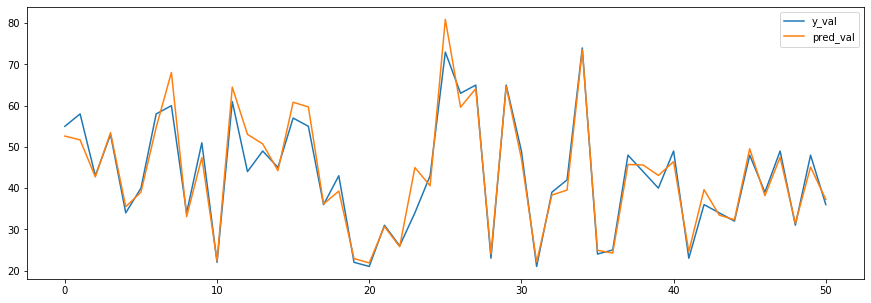

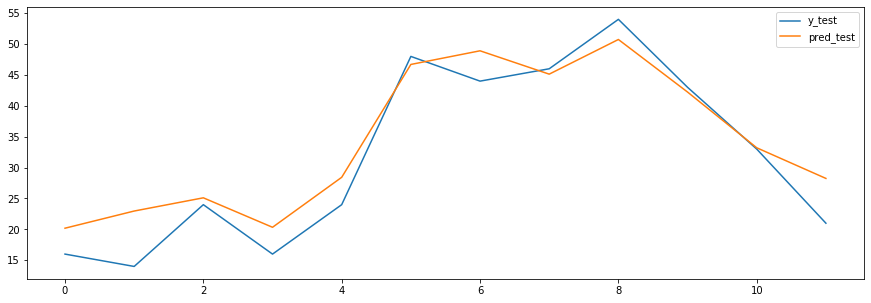

In [7]:
plt.figure(figsize=(15,5))
plt.plot(y_train, label='y_train')
plt.plot(pred_train, label='pred_train')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_val, label='y_val')
plt.plot(pred_val, label='pred_val')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_test, label='y_test')
plt.plot(pred_test, label='pred_test')
plt.legend(loc='best')
plt.show()

/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/nurik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


1.859411183748435
3.4983931885882673
4.966960002523341


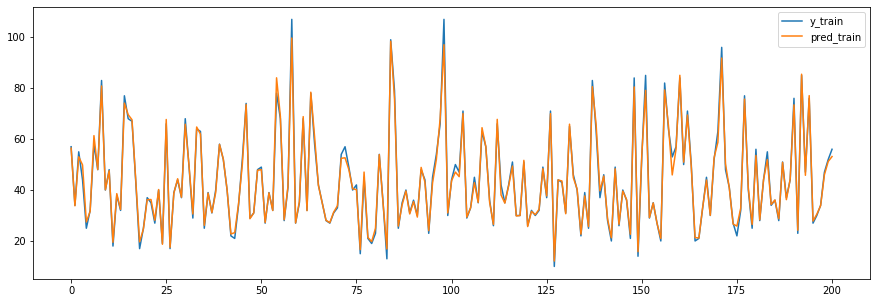

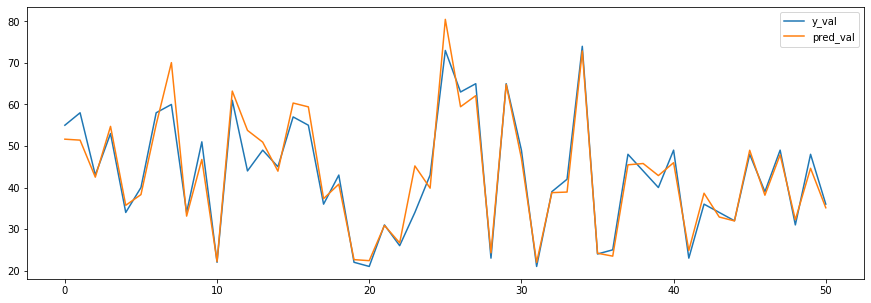

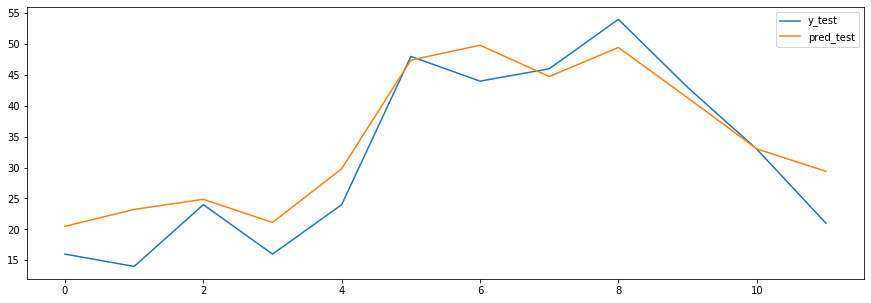

In [8]:
cyclical = CyclicalFeatures(variables=None, drop_original=True)
df[['MONAT_SIN','MONAT_COS']] = cyclical.fit_transform(df['MONAT'].str.slice(4).astype(int).to_numpy().reshape(-1, 1))

train_df = df[df.JAHR<2021][df.MONATSZAHL=='Alkoholunfälle'][df.AUSPRAEGUNG=='insgesamt'][df.MONAT!='Summe']
test_df = df[df.JAHR==2021][df.MONATSZAHL=='Alkoholunfälle'][df.AUSPRAEGUNG=='insgesamt'][df.MONAT!='Summe']
features_list = ['MONAT_INT','JAHR','MONAT_SIN','MONAT_COS','VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']
X_train, X_val, y_train, y_val = train_test_split(train_df[features_list].values, train_df['WERT'].to_list(), test_size=0.2, random_state=42, shuffle=True)
X_test, y_test = test_df[features_list].values, test_df['WERT'].to_list()

rf = RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=42)
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)
pred_val = rf.predict(X_val)
pred_test = rf.predict(X_test)

print(mse(y_train, pred_train, squared=False))
print(mse(y_val, pred_val, squared=False))
print(mse(y_test, pred_test, squared=False))

plt.figure(figsize=(15,5))
plt.plot(y_train, label='y_train')
plt.plot(pred_train, label='pred_train')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_val, label='y_val')
plt.plot(pred_val, label='pred_val')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_test, label='y_test')
plt.plot(pred_test, label='pred_test')
plt.legend(loc='best')
plt.show()

## Build a LightGBM model

In [9]:
import optuna.integration.lightgbm as lgb

In [10]:
X_train_lgb = lgb.Dataset(X_train, label=y_train)
X_val_lgb = lgb.Dataset(X_val, label=y_val)
X_test_lgb = lgb.Dataset(X_test, label=y_test)

AttributeError: module 'optuna.integration.lightgbm' has no attribute 'Dataset'

In [ ]:
param = {'objective':'regression', 'metric':'rmse'}

In [12]:
import lightgbm as lgb

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
#num_round = 1000
bst = lgb.train(param, 
                X_train_lgb,
                valid_sets=[X_val_lgb], 
                callbacks=[lgb.early_stopping(stopping_rounds=20)])

In [ ]:
bst.params

In [ ]:
pred_train = bst.predict(X_train).reshape(-1, 1)
pred_val = bst.predict(X_val).reshape(-1, 1)
pred_test = bst.predict(X_test).reshape(-1, 1)

print(mse(y_train, pred_train, squared=False))
print(mse(y_val, pred_val, squared=False))
print(mse(y_test, pred_test, squared=False))

plt.figure(figsize=(15,5))
plt.plot(y_train, label='y_train')
plt.plot(pred_train, label='pred_train')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_val, label='y_val')
plt.plot(pred_val, label='pred_val')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_test, label='y_test')
plt.plot(pred_test, label='pred_test')
plt.legend(loc='best')
plt.show()